In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afe3268d458119ba148d14fc166304cd


In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

55.713012899160674 16.915370502136227
-32.668260817590834 66.94760735136586
-20.966615489034908 -92.66238495063982
-54.14263043226717 9.245039107241126
57.54820142688959 -12.00541594113298
12.639421209338252 172.10058448190227
15.591300258416553 36.216269645106166
51.41478342636637 79.62518823891969
33.30572662929052 -155.39040323536514
73.95681731121556 173.23599077983698
22.361983449854407 -126.23445654392043
-60.657463321969146 -156.6893328745367
-6.822100195769849 -74.60315870557577
38.41994082932803 -51.67495817555434
-80.17915369853621 65.87340884774534
24.65367970348639 177.57402810855598
59.34386184434007 -152.99325945709182
-86.78230250374969 133.22263306833776
-23.981271035562003 111.32850284745837
15.465558025163858 -71.63250048251592
84.92887495401067 52.01350478120929
89.03779535406983 -8.611858725654685
84.10240672585363 12.167313141863445
74.83913236188053 63.52360052173168
71.31820957722624 -131.80010961192895
-16.1767955601359 70.60249493073349
-6.457344718666391 28.64

22.29920482542302 -34.81108939256828
16.728779766124973 132.6674911171158
30.426692799134827 -89.9062223131083
1.7975883112650592 -5.79543915307741
-15.24511304204674 -7.9508022562718565
45.58498978089824 16.29882314688868
20.612837726987934 -33.46548723367707
-70.05375097769199 121.20358279019928
-27.004271415837138 134.573186199485
-63.11433432031849 -52.96170663306758
77.53651363123552 -56.11147978349011
-75.43303722768333 -102.34866512899232
-31.430274375954482 143.78183960218428
68.19470479308697 128.95763823998607
1.5575951927003473 -40.081982805332615
76.882531910534 -89.48460446818964
-28.788217298544083 22.074029460364585
78.33507910379879 -77.02231011333292
-10.745267583101707 160.13151925239606
-23.081090925362815 -168.35148987497664
43.68542616593703 87.63860598576792
-7.221635729321534 147.42018426395094
12.224280869792608 -157.00036739750163
87.61772205479383 -30.56835582901644
50.84923370735427 2.565162416967013
-82.2182541749998 176.84812027440734
-19.848909779713352 -1

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kalmar
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | lima
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | ballina
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | kassala
Processing Record 8 of Set 1 | malinovoye ozero
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | contamana
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | homer
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | pedernales
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | illoqqortoormiut
City not found.

Processing Record 36 of Set 4 | los llanos de aridane
Processing Record 37 of Set 4 | jamestown
Processing Record 38 of Set 4 | kulhudhuffushi
Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | batagay-alyta
Processing Record 43 of Set 4 | balabac
Processing Record 44 of Set 4 | shchelyayur
City not found. Skipping...
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | verkhnevilyuysk
Processing Record 50 of Set 4 | soria
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | roseau
Processing Record 4 of Set 5 | huanan
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | erenhot
Processing Record 7 of Set 5 | poum
Processing Reco

Processing Record 27 of Set 8 | mogadishu
Processing Record 28 of Set 8 | liniere
City not found. Skipping...
Processing Record 29 of Set 8 | myitkyina
Processing Record 30 of Set 8 | oksfjord
Processing Record 31 of Set 8 | warqla
City not found. Skipping...
Processing Record 32 of Set 8 | svetlogorsk
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | salamanca
Processing Record 35 of Set 8 | beyneu
Processing Record 36 of Set 8 | kirakira
Processing Record 37 of Set 8 | talara
Processing Record 38 of Set 8 | sosnovka
Processing Record 39 of Set 8 | paysandu
Processing Record 40 of Set 8 | sao miguel do tapuio
Processing Record 41 of Set 8 | nalut
Processing Record 42 of Set 8 | muroto
Processing Record 43 of Set 8 | anderson
Processing Record 44 of Set 8 | ostrovnoy
Processing Record 45 of Set 8 | puerto escondido
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | knyaze-volkonskoye
Processing Record 48 of Set 8 | komsomolets
Processing Reco

Processing Record 15 of Set 12 | rocha
Processing Record 16 of Set 12 | monster
Processing Record 17 of Set 12 | ola
Processing Record 18 of Set 12 | lixourion
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | uray
Processing Record 21 of Set 12 | sokolo
Processing Record 22 of Set 12 | isla vista
Processing Record 23 of Set 12 | penzance
Processing Record 24 of Set 12 | matata
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | hyeres
Processing Record 27 of Set 12 | butte
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | vinkovci
Processing Record 30 of Set 12 | roma
Processing Record 31 of Set 12 | jarjis
City not found. Skipping...
Processing Record 32 of Set 12 | jinchang
Processing Record 33 of Set 12 | kyra
Processing Record 34 of Set 12 | diego de almagro
Processing Record 35 of Set 12 | venice
Processing Record 36 of Set 12 | mercedes
Processing Record 37 of Set 12 | henties bay
Processing Record 38 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmar,56.6616,16.3616,67.14,65,38,5.99,SE,2022-07-09 18:16:47
1,Mahebourg,-20.4081,57.7000,68.29,68,40,14.97,MU,2022-07-09 18:16:47
2,Lima,-12.0432,-77.0282,70.90,67,75,12.66,PE,2022-07-09 18:12:04
3,Hermanus,-34.4187,19.2345,54.81,74,18,10.11,ZA,2022-07-09 18:16:48
4,Ballina,-28.8667,153.5667,49.01,85,79,8.88,AU,2022-07-09 18:16:48
5,Butaritari,3.0707,172.7902,81.12,80,72,12.19,KI,2022-07-09 18:16:49
6,Kassala,15.4510,36.4000,80.78,65,97,15.73,SD,2022-07-09 18:16:49
7,Malinovoye Ozero,51.6753,79.7825,63.66,88,93,9.75,RU,2022-07-09 18:16:50
8,Kapaa,22.0752,-159.3190,80.58,85,75,12.66,US,2022-07-09 18:16:50
9,Komsomolskiy,40.4272,71.7189,81.32,26,100,4.61,UZ,2022-07-09 18:16:50


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

In [18]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kalmar,SE,2022-07-09 18:16:47,56.6616,16.3616,67.14,65,38,5.99
1,Mahebourg,MU,2022-07-09 18:16:47,-20.4081,57.7000,68.29,68,40,14.97
2,Lima,PE,2022-07-09 18:12:04,-12.0432,-77.0282,70.90,67,75,12.66
3,Hermanus,ZA,2022-07-09 18:16:48,-34.4187,19.2345,54.81,74,18,10.11
4,Ballina,AU,2022-07-09 18:16:48,-28.8667,153.5667,49.01,85,79,8.88
5,Butaritari,KI,2022-07-09 18:16:49,3.0707,172.7902,81.12,80,72,12.19
6,Kassala,SD,2022-07-09 18:16:49,15.4510,36.4000,80.78,65,97,15.73
7,Malinovoye Ozero,RU,2022-07-09 18:16:50,51.6753,79.7825,63.66,88,93,9.75
8,Kapaa,US,2022-07-09 18:16:50,22.0752,-159.3190,80.58,85,75,12.66
9,Komsomolskiy,UZ,2022-07-09 18:16:50,40.4272,71.7189,81.32,26,100,4.61


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

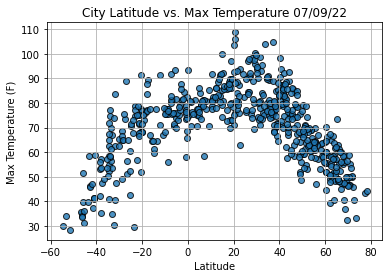

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

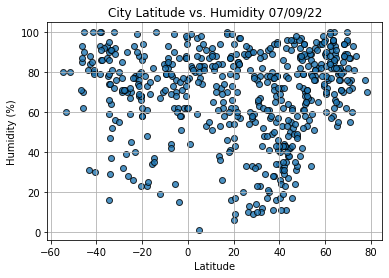

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

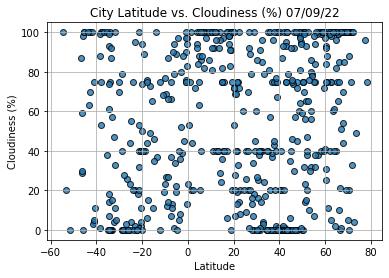

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

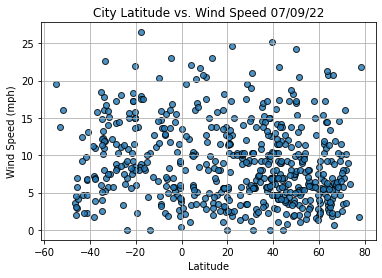

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()